In [1]:
'''

The following two functions do
Import the txt and merge them 
--
    ‘Merge’ sectorcode with the purpose.csv to bring in the column macro_sector
    ‘Merge’ (donorcode & agencycode) with the donor.csv to bring the columns is_ppd is_wbg
    Collapse sum (USD 5 measure) by (Year, RecipientCountry, macro_sector, is_ppd, is_wbg)

'''


print(__doc__)

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas

import argparse

import re




def merge_CRStxt_files(ArrayVal):

    
    tempArray = []
    finalMerged = pd.DataFrame()
    
 
    for eachFile in ArrayVal:
        
        tempArray.append(pd.read_table(eachFile, sep = "|", encoding='latin-1', low_memory=False))
        
        
    for pdFiles in tempArray:
        
        finalMerged = pd.concat([pdFiles, finalMerged])
        
    return finalMerged 



def merge_and_collapse(donors_classification, sector_groups, CRS_data, groupbyCols, colsForSummation, mergeON):


    donorsClassification = pandas.read_csv(donors_classification, low_memory=False)

    sectorData = pd.read_csv(sector_groups, low_memory=False)

    sectorData = sectorData.rename(columns= {'mmg_purpose_code':'SectorCode'})

    mergedFile_donorClass_and_CRSdata = pd.merge(donorsClassification, CRS_data, on = mergeON)
     
    finalMerged = pd.merge(sectorData, mergedFile_donorClass_and_CRSdata, on = ["SectorCode"])
    
    print(finalMerged.keys())
    
    sumOverTheYears = finalMerged.groupby(groupbyCols, as_index = False)[colsForSummation].sum()
    
    return sumOverTheYears



CRS_Data = merge_CRStxt_files(["CRS 2002-03 data.txt", "CRS 2004-05 data.txt", "CRS 2006 data.txt", "CRS 2008 data.txt", "CRS 2010 data.txt", "CRS 2011 data.txt", "CRS 2013 data.txt","CRS 2014 data.txt", "CRS 2015 data.txt", "CRS 2016 data.txt",  "CRS 2019 data.txt", "CRS 2020 data.txt"])

#print(CRS_Data.keys())

combinedDataForAnalysis = merge_and_collapse('OECD_CRS_donors_classification_UTF8Aben.csv', "MMG_sector_groups.csv", CRS_Data, ['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG', 'DonorCode'],['USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl', 'USD_Disbursement_Defl'], ["DonorCode", "AgencyCode"] )


print(combinedDataForAnalysis.keys())

combinedDataForAnalysis








The following two functions do
Import the txt and merge them 
--
    ‘Merge’ sectorcode with the purpose.csv to bring in the column macro_sector
    ‘Merge’ (donorcode & agencycode) with the donor.csv to bring the columns is_ppd is_wbg
    Collapse sum (USD 5 measure) by (Year, RecipientCountry, macro_sector, is_ppd, is_wbg)


Index(['mmg_purpose_sector', 'mmg_purpose_sectorname', 'SectorCode',
       'mmg_purpose_codename', 'macro_sector', 'DonorTypeCode',
       'DonorTypeName', 'DonorCode', 'DonorName_x', 'AgencyCode',
       ...
       'USD_Interest', 'USD_Outstanding', 'USD_Arrears_Principal',
       'USD_Arrears_Interest', 'BudgetIdent', 'CapitalExpend', 'PSIflag',
       'PSIAddType', 'PSIAddAssess', 'PSIAddDevObj'],
      dtype='object', length=104)
Index(['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG', 'DonorCode',
       'USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl',
       'USD_Disbursement_Defl'],
      dtype='object')


,Year,RecipientName,macro_sector,IsPPD,IsWBG,DonorCode,USD_Commitment,USD_Disbursement,USD_Commitment_Defl,USD_Disbursement_Defl
0,2002,Afghanistan,Agriculture,0,0,3,192.788193,0.000000,297.637413,0.000000
1,2002,Afghanistan,Agriculture,0,0,7,89.529729,95.223820,135.608301,144.232990
2,2002,Afghanistan,Agriculture,0,0,8,2.091330,2.093781,3.344323,3.348199
3,2002,Afghanistan,Agriculture,0,0,21,3.581196,3.581196,5.253101,5.253101
4,2002,Afghanistan,Agriculture,0,0,302,137.180000,8.303000,190.007220,11.500434
...,...,...,...,...,...,...,...,...,...,...
301626,2020,Zimbabwe,Other,0,0,55,2.588208,2.588208,2.837159,2.837159
301627,2020,Zimbabwe,Other,0,0,87,0.000000,0.960562,0.000000,1.116196
301628,2020,Zimbabwe,Other,0,0,546,0.000000,0.076400,0.000000,0.073282
301629,2020,Zimbabwe,Other,0,0,966,0.176766,0.176766,0.172158,0.172158


In [2]:
'''
the function below will filter the macroSectors we want to filter out. In this case, I chose to filter Education, Wash, and Health as given by the instruction. 

But I also made it non-manual for anyone to set the macrosector list they want to filter out.

'''
def macroSectorFilter(arrayVal, colsForSummation, groupby):
    
    filteredMacroSectorData = combinedDataForAnalysis[combinedDataForAnalysis.macro_sector.isin(arrayVal)]
    
    print(combinedDataForAnalysis.keys())
    
    sumOverTheYears = filteredMacroSectorData.groupby(groupby, as_index = False)[colsForSummation].sum()


    return sumOverTheYears


    
    
macroSectorFilter(['Health', 'Education', 'Wash'], ['USD_Commitment',  'DonorCode' ,'USD_Disbursement', 'USD_Commitment_Defl', 'USD_Disbursement_Defl'], ['macro_sector', 'IsPPD', 'IsWBG'])





Index(['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG', 'DonorCode',
       'USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl',
       'USD_Disbursement_Defl'],
      dtype='object')


,macro_sector,IsPPD,IsWBG,USD_Commitment,DonorCode,USD_Disbursement,USD_Commitment_Defl,USD_Disbursement_Defl
0,Education,0,0,3.532312e+05,10242290,3.011890e+05,3.611533e+05,3.037179e+05
1,Education,1,0,4.699664e+04,1308168,5.126176e+04,4.654661e+04,4.887280e+04
2,Education,1,1,1.093080e+05,1601258,8.855306e+04,1.132689e+05,9.267136e+04
3,Health,0,0,1.167354e+06,14035232,1.045538e+06,1.245161e+06,1.109954e+06
4,Health,1,0,3.428756e+05,3019262,3.207269e+05,3.421577e+05,3.135297e+05
5,Health,1,1,2.011395e+05,1484633,1.579102e+05,2.075627e+05,1.653141e+05
6,Wash,0,0,8.697404e+05,6596368,5.643434e+05,8.802445e+05,5.694139e+05
7,Wash,1,0,3.207415e+05,1243622,2.500978e+05,3.162321e+05,2.425772e+05
8,Wash,1,1,4.018111e+05,1524163,3.014793e+05,4.089968e+05,3.086160e+05


In [3]:
'''
the function below will filter the macroSectors we want to filter out. In this case, I chose to filter Education, Wash, and Health as given by the instruction. 

But I also made it non-manual for anyone to set the macrosector list they want to filter out.

'''
def macroSectorFilter(arrayVal, colsForSummation, groupby):
    
    print( combinedDataForAnalysis.keys())
    
    filteredMacroSectorData = combinedDataForAnalysis[combinedDataForAnalysis.macro_sector.isin(arrayVal)]
    
    sumOverTheYears = filteredMacroSectorData.groupby(groupby, as_index = False)[colsForSummation].sum()


    return sumOverTheYears


    
    
macroSectorFilter(['Health', 'Education', 'Wash'], ['USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl', 'USD_Disbursement_Defl'], ['macro_sector', 'IsPPD', 'IsWBG'])





Index(['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG', 'DonorCode',
       'USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl',
       'USD_Disbursement_Defl'],
      dtype='object')


,macro_sector,IsPPD,IsWBG,USD_Commitment,USD_Disbursement,USD_Commitment_Defl,USD_Disbursement_Defl
0,Education,0,0,3.532312e+05,3.011890e+05,3.611533e+05,3.037179e+05
1,Education,1,0,4.699664e+04,5.126176e+04,4.654661e+04,4.887280e+04
2,Education,1,1,1.093080e+05,8.855306e+04,1.132689e+05,9.267136e+04
3,Health,0,0,1.167354e+06,1.045538e+06,1.245161e+06,1.109954e+06
4,Health,1,0,3.428756e+05,3.207269e+05,3.421577e+05,3.135297e+05
5,Health,1,1,2.011395e+05,1.579102e+05,2.075627e+05,1.653141e+05
6,Wash,0,0,8.697404e+05,5.643434e+05,8.802445e+05,5.694139e+05
7,Wash,1,0,3.207415e+05,2.500978e+05,3.162321e+05,2.425772e+05
8,Wash,1,1,4.018111e+05,3.014793e+05,4.089968e+05,3.086160e+05


In [4]:
macroSectorFilter(['Health', 'Education', 'Wash'], ['USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl', 'USD_Disbursement_Defl'], ['macro_sector'])


Index(['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG', 'DonorCode',
       'USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl',
       'USD_Disbursement_Defl'],
      dtype='object')


,macro_sector,USD_Commitment,USD_Disbursement,USD_Commitment_Defl,USD_Disbursement_Defl
0,Education,5.095359e+05,4.410039e+05,5.209688e+05,4.452621e+05
1,Health,1.711369e+06,1.524175e+06,1.794881e+06,1.588798e+06
2,Wash,1.592293e+06,1.115920e+06,1.605473e+06,1.120607e+06


In [5]:
macroSectorFilter(['Health', 'Education', 'Wash'], ['USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl', 'USD_Disbursement_Defl'], ['Year', 'macro_sector', 'IsPPD', 'IsWBG'])




Index(['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG', 'DonorCode',
       'USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl',
       'USD_Disbursement_Defl'],
      dtype='object')


,Year,macro_sector,IsPPD,IsWBG,USD_Commitment,USD_Disbursement,USD_Commitment_Defl,USD_Disbursement_Defl
0,2002,Education,0,0,11072.454081,6892.393189,16320.386916,10426.011635
1,2002,Education,1,0,1614.643423,562.347320,2201.821297,739.600952
2,2002,Education,1,1,5840.933905,4612.710849,8202.029709,6477.318959
3,2002,Health,0,0,26470.008032,19613.628198,38265.910745,28179.171082
4,2002,Health,1,0,5234.042364,3385.912701,6590.088602,4244.585225
...,...,...,...,...,...,...,...,...
115,2019,Wash,1,0,27389.738292,31202.635236,27389.738292,31202.635236
116,2019,Wash,1,1,36925.258560,40038.475836,36925.258560,40038.475836
117,2020,Education,0,0,1622.521423,1469.399238,1683.016156,1535.539261
118,2020,Health,0,0,22512.356035,10928.487696,21952.713342,10738.378002


In [26]:


dataForNetworkAnalysis = macroSectorFilter([ 'Education'], ['USD_Commitment', 'USD_Commitment_Defl', 'DonorCode' ], ['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG'])

print(dataForNetworkAnalysis.keys())

dataForNetworkAnalysis

Index(['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG', 'DonorCode',
       'USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl',
       'USD_Disbursement_Defl'],
      dtype='object')
Index(['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG',
       'USD_Commitment', 'USD_Commitment_Defl', 'DonorCode'],
      dtype='object')


,Year,RecipientName,macro_sector,IsPPD,IsWBG,USD_Commitment,USD_Commitment_Defl,DonorCode
0,2002,Afghanistan,Education,0,0,106.469800,168.272811,3058
1,2002,Afghanistan,Education,1,0,9.424180,14.093265,5
2,2002,Afghanistan,Education,1,1,37.350000,52.448088,905
3,2002,"Africa, regional",Education,0,0,127.921160,203.368172,2192
4,2002,"Africa, regional",Education,1,0,2.018870,2.445385,12
...,...,...,...,...,...,...,...,...
5459,2020,Viet Nam,Education,0,0,2.799044,2.729754,162
5460,2020,West Bank and Gaza Strip,Education,0,0,120.553894,123.152068,1109
5461,2020,Yemen,Education,0,0,0.520242,0.517106,217
5462,2020,Zambia,Education,0,0,0.127862,0.131100,56


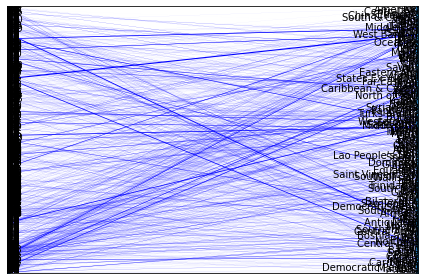

<Figure size 1e+10x1e+10 with 0 Axes>

<class 'networkx.classes.graph.Graph'>


In [58]:
import networkx as nx

import pandas as pd

import matplotlib.pyplot as plt

from networkx.algorithms import bipartite

#dataForNetworkAnalysis = dataForNetworkAnalysis[:10000]

def drawGraph(dataForNetworkAnalysis):
    

    B = nx.Graph()
    
    
    
    #print(betweenness_centrality(B, k=None, normalized=True, weight=None, endpoints=False, seed=None))

    RecepientNameNode = []

    DonorCode = []

    tupleVal = []

    keyVal = 0

    Weight_from_USDCommitment = []

    for key, value in dataForNetworkAnalysis.iterrows():

        keyVal +=1

        RecepientNameNode.append(value[1])

        DonorCode.append(value[7])

        Weight_from_USDCommitment.append(value[5])

    for key, value in dataForNetworkAnalysis.iterrows():

        tupleVal.append((value[1], value[7]))

    B.add_edges_from(tupleVal, weight= Weight_from_USDCommitment)





    bipartite.is_bipartite(B)

    edges = B.edges()

    bipartite.is_bipartite(B)
    edges = B.edges()

    weightVal = [d['weight'] for _, _, d in B.edges(data=True)] [0]
    #print(weightVal)

    newWeight = []
    for i in range(len(weightVal)):

        newWeight.append(weightVal[i]/4000)


    #print(newWeight)


    ResultGraph = nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, DonorCode), width = newWeight, edge_color= 'blue', node_size = 20, font_size=10, font_family="sans-serif")
    
    ax = plt.gca()
    ax.margins(0.00001)
    #plt.axis("off")
    plt.tight_layout()
    plt.figure(3,figsize=(1000000,1000000), dpi=10000) 
    plt.show()
    
    return B

    
G = drawGraph(dataForNetworkAnalysis)

G
print(type(G))

#print(edges)
    
    

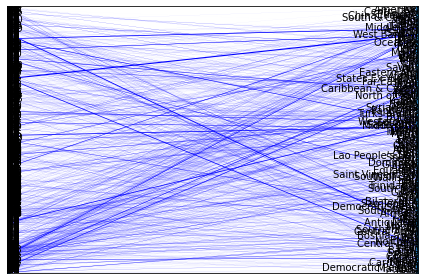

<Figure size 1e+10x1e+10 with 0 Axes>

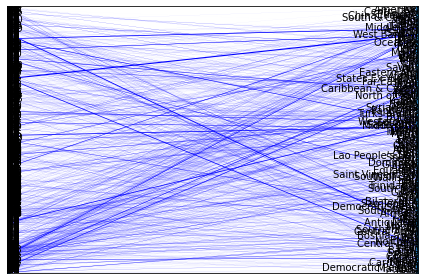

<Figure size 1e+10x1e+10 with 0 Axes>

{'Afghanistan': 0.014998237846871008,
 3058: 0.0,
 5: 0.02806634325703601,
 905: 0.21086196142214925,
 'Africa, regional': 0.011441530443190967,
 2192: 5.933871926952196e-05,
 12: 0.027713585725860215,
 'Albania': 0.013439882443605488,
 2023: 0.0,
 'Algeria': 0.009755730979718014,
 2256: 0.0,
 901: 0.03288661537866831,
 'America, regional': 0.012585382356979528,
 2408: 0.0,
 'Angola': 0.01356421669541377,
 2699: 1.9496605353229574e-05,
 'Anguilla': 0.00020339793291380983,
 'Antigua and Barbuda': 0.01052003131780353,
 922: 8.509275628026418e-05,
 'Argentina': 0.012036633111784963,
 2182: 5.2380739451164976e-05,
 'Armenia': 0.012280661638049252,
 2295: 0.0,
 'Asia, regional': 0.016147203949717345,
 1166: 0.0,
 'Azerbaijan': 0.011422997507609093,
 2002: 2.062127271963279e-05,
 'Bahrain': 0.0016635527912069487,
 9: 0.0010558509286899315,
 'Bangladesh': 0.01311544323705194,
 4705: 0.0,
 932: 2.326046551983676e-05,
 'Barbados': 0.004393434758439003,
 59: 0.0,
 'Belize': 0.012479514949127446,

In [59]:
    
G = drawGraph(dataForNetworkAnalysis)

@py_random_state(5)
@not_implemented_for("multigraph")
def betweenness_centrality(
    G, k=None, normalized=True, weight=None, endpoints=False, seed=None
):
    r"""Compute the shortest-path betweenness centrality for nodes.

    Betweenness centrality of a node $v$ is the sum of the
    fraction of all-pairs shortest paths that pass through $v$

    .. math::

       c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}

    where $V$ is the set of nodes, $\sigma(s, t)$ is the number of
    shortest $(s, t)$-paths,  and $\sigma(s, t|v)$ is the number of
    those paths  passing through some  node $v$ other than $s, t$.
    If $s = t$, $\sigma(s, t) = 1$, and if $v \in {s, t}$,
    $\sigma(s, t|v) = 0$ [2]_.

    Parameters
    ----------
    G : graph
      A NetworkX graph.

    k : int, optional (default=None)
      If k is not None use k node samples to estimate betweenness.
      The value of k <= n where n is the number of nodes in the graph.
      Higher values give better approximation.

    normalized : bool, optional
      If True the betweenness values are normalized by `2/((n-1)(n-2))`
      for graphs, and `1/((n-1)(n-2))` for directed graphs where `n`
      is the number of nodes in G.

    weight : None or string, optional (default=None)
      If None, all edge weights are considered equal.
      Otherwise holds the name of the edge attribute used as weight.
      Weights are used to calculate weighted shortest paths, so they are
      interpreted as distances.

    endpoints : bool, optional
      If True include the endpoints in the shortest path counts.

    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.
        Note that this is only used if k is not None.

    Returns
    -------
    nodes : dictionary
       Dictionary of nodes with betweenness centrality as the value.

    See Also
    --------
    edge_betweenness_centrality
    load_centrality

    Notes
    -----
    The algorithm is from Ulrik Brandes [1]_.
    See [4]_ for the original first published version and [2]_ for details on
    algorithms for variations and related metrics.

    For approximate betweenness calculations set k=#samples to use
    k nodes ("pivots") to estimate the betweenness values. For an estimate
    of the number of pivots needed see [3]_.

    For weighted graphs the edge weights must be greater than zero.
    Zero edge weights can produce an infinite number of equal length
    paths between pairs of nodes.

    The total number of paths between source and target is counted
    differently for directed and undirected graphs. Directed paths
    are easy to count. Undirected paths are tricky: should a path
    from "u" to "v" count as 1 undirected path or as 2 directed paths?

    For betweenness_centrality we report the number of undirected
    paths when G is undirected.

    For betweenness_centrality_subset the reporting is different.
    If the source and target subsets are the same, then we want
    to count undirected paths. But if the source and target subsets
    differ -- for example, if sources is {0} and targets is {1},
    then we are only counting the paths in one direction. They are
    undirected paths but we are counting them in a directed way.
    To count them as undirected paths, each should count as half a path.

    References
    ----------
    .. [1] Ulrik Brandes:
       A Faster Algorithm for Betweenness Centrality.
       Journal of Mathematical Sociology 25(2):163-177, 2001.
       https://doi.org/10.1080/0022250X.2001.9990249
    .. [2] Ulrik Brandes:
       On Variants of Shortest-Path Betweenness
       Centrality and their Generic Computation.
       Social Networks 30(2):136-145, 2008.
       https://doi.org/10.1016/j.socnet.2007.11.001
    .. [3] Ulrik Brandes and Christian Pich:
       Centrality Estimation in Large Networks.
       International Journal of Bifurcation and Chaos 17(7):2303-2318, 2007.
       https://dx.doi.org/10.1142/S0218127407018403
    .. [4] Linton C. Freeman:
       A set of measures of centrality based on betweenness.
       Sociometry 40: 35–41, 1977
       https://doi.org/10.2307/3033543
    """
    betweenness = dict.fromkeys(G, 0.0)  # b[v]=0 for v in G
    if k is None:
        nodes = G
    else:
        nodes = seed.sample(list(G.nodes()), k)
    for s in nodes:
        # single source shortest paths
        if weight is None:  # use BFS
            S, P, sigma, _ = _single_source_shortest_path_basic(G, s)
        else:  # use Dijkstra's algorithm
            S, P, sigma, _ = _single_source_dijkstra_path_basic(G, s, weight)
        # accumulation
        if endpoints:
            betweenness, delta = _accumulate_endpoints(betweenness, S, P, sigma, s)
        else:
            betweenness, delta = _accumulate_basic(betweenness, S, P, sigma, s)
    # rescaling
    betweenness = _rescale(
        betweenness,
        len(G),
        normalized=normalized,
        directed=G.is_directed(),
        k=k,
        endpoints=endpoints,
    )
    return betweenness

    
G = drawGraph(dataForNetworkAnalysis)

betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)

In [ ]:


dataForNetworkAnalysis2 = macroSectorFilter([ 'Wash'], ['USD_Commitment', 'USD_Commitment_Defl', 'DonorCode' ], ['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG'])

dataForNetworkAnalysis2

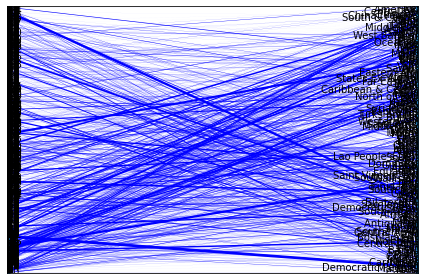

<Figure size 1e+10x1e+10 with 0 Axes>

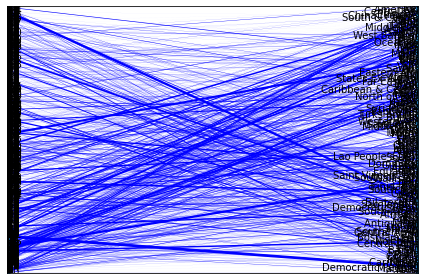

<Figure size 1e+10x1e+10 with 0 Axes>

<class 'networkx.classes.graph.Graph'>


{('Afghanistan', 2179): 0.0011580775911986102,
 ('Afghanistan', 5): 0.00271945601946061,
 ('Afghanistan', 905): 0.003183604757014192,
 ('Afghanistan', 3048): 0.0011580775911986102,
 ('Afghanistan', 2162): 0.0011580775911986102,
 ('Afghanistan', 706): 0.0028070053776486485,
 ('Afghanistan', 2217): 0.0006841919113100112,
 ('Afghanistan', 2966): 0.0011580775911986102,
 ('Afghanistan', 1621): 0.0005973096245638833,
 ('Afghanistan', 2235): 0.0011580775911986102,
 ('Afghanistan', 701): 0.005242061465494153,
 ('Afghanistan', 5366): 0.0011580775911986102,
 ('Afghanistan', 1628): 0.0007459393501890242,
 ('Afghanistan', 3584): 0.0011580775911986102,
 ('Afghanistan', 713): 0.002247425492617975,
 ('Afghanistan', 4682): 0.0011580775911986102,
 ('Afghanistan', 1616): 0.0011585429608678918,
 ('Afghanistan', 5378): 0.0011580775911986102,
 ('Afghanistan', 4555): 0.000661569228373834,
 ('Afghanistan', 3929): 0.0011580775911986102,
 ('Afghanistan', 5293): 0.0011580775911986102,
 ('Afghanistan', 55): 0.00

In [61]:
G = drawGraph(dataForNetworkAnalysis2)

@py_random_state(4)


def edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None):
    r"""Compute betweenness centrality for edges.

    Betweenness centrality of an edge $e$ is the sum of the
    fraction of all-pairs shortest paths that pass through $e$

    .. math::

       c_B(e) =\sum_{s,t \in V} \frac{\sigma(s, t|e)}{\sigma(s, t)}

    where $V$ is the set of nodes, $\sigma(s, t)$ is the number of
    shortest $(s, t)$-paths, and $\sigma(s, t|e)$ is the number of
    those paths passing through edge $e$ [2]_.

    Parameters
    ----------
    G : graph
      A NetworkX graph.

    k : int, optional (default=None)
      If k is not None use k node samples to estimate betweenness.
      The value of k <= n where n is the number of nodes in the graph.
      Higher values give better approximation.

    normalized : bool, optional
      If True the betweenness values are normalized by $2/(n(n-1))$
      for graphs, and $1/(n(n-1))$ for directed graphs where $n$
      is the number of nodes in G.

    weight : None or string, optional (default=None)
      If None, all edge weights are considered equal.
      Otherwise holds the name of the edge attribute used as weight.
      Weights are used to calculate weighted shortest paths, so they are
      interpreted as distances.

    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.
        Note that this is only used if k is not None.

    Returns
    -------
    edges : dictionary
       Dictionary of edges with betweenness centrality as the value.

    See Also
    --------
    betweenness_centrality
    edge_load

    Notes
    -----
    The algorithm is from Ulrik Brandes [1]_.

    For weighted graphs the edge weights must be greater than zero.
    Zero edge weights can produce an infinite number of equal length
    paths between pairs of nodes.

    References
    ----------
    .. [1]  A Faster Algorithm for Betweenness Centrality. Ulrik Brandes,
       Journal of Mathematical Sociology 25(2):163-177, 2001.
       https://doi.org/10.1080/0022250X.2001.9990249
    .. [2] Ulrik Brandes: On Variants of Shortest-Path Betweenness
       Centrality and their Generic Computation.
       Social Networks 30(2):136-145, 2008.
       https://doi.org/10.1016/j.socnet.2007.11.001
    """
    betweenness = dict.fromkeys(G, 0.0)  # b[v]=0 for v in G
    # b[e]=0 for e in G.edges()
    betweenness.update(dict.fromkeys(G.edges(), 0.0))
    if k is None:
        nodes = G
    else:
        nodes = seed.sample(G.nodes(), k)
    for s in nodes:
        # single source shortest paths
        if weight is None:  # use BFS
            S, P, sigma, _ = _single_source_shortest_path_basic(G, s)
        else:  # use Dijkstra's algorithm
            S, P, sigma, _ = _single_source_dijkstra_path_basic(G, s, weight)
        # accumulation
        betweenness = _accumulate_edges(betweenness, S, P, sigma, s)
    # rescaling
    for n in G:  # remove nodes to only return edges
        del betweenness[n]
    betweenness = _rescale_e(
        betweenness, len(G), normalized=normalized, directed=G.is_directed()
    )
    return betweenness



# obsolete name
def edge_betweenness(G, k=None, normalized=True, weight=None, seed=None):
    warnings.warn(
        "edge_betweeness is replaced by edge_betweenness_centrality", DeprecationWarning
    )
    return edge_betweenness_centrality(G, k, normalized, weight, seed)


# helpers for betweenness centrality


def _single_source_shortest_path_basic(G, s):
    S = []
    P = {}
    for v in G:
        P[v] = []
    sigma = dict.fromkeys(G, 0.0)  # sigma[v]=0 for v in G
    D = {}
    sigma[s] = 1.0
    D[s] = 0
    Q = [s]
    while Q:  # use BFS to find shortest paths
        v = Q.pop(0)
        S.append(v)
        Dv = D[v]
        sigmav = sigma[v]
        for w in G[v]:
            if w not in D:
                Q.append(w)
                D[w] = Dv + 1
            if D[w] == Dv + 1:  # this is a shortest path, count paths
                sigma[w] += sigmav
                P[w].append(v)  # predecessors
    return S, P, sigma, D


def _single_source_dijkstra_path_basic(G, s, weight):
    # modified from Eppstein
    S = []
    P = {}
    for v in G:
        P[v] = []
    sigma = dict.fromkeys(G, 0.0)  # sigma[v]=0 for v in G
    D = {}
    sigma[s] = 1.0
    push = heappush
    pop = heappop
    seen = {s: 0}
    c = count()
    Q = []  # use Q as heap with (distance,node id) tuples
    push(Q, (0, next(c), s, s))
    while Q:
        (dist, _, pred, v) = pop(Q)
        if v in D:
            continue  # already searched this node.
        sigma[v] += sigma[pred]  # count paths
        S.append(v)
        D[v] = dist
        for w, edgedata in G[v].items():
            vw_dist = dist + edgedata.get(weight, 1)
            if w not in D and (w not in seen or vw_dist < seen[w]):
                seen[w] = vw_dist
                push(Q, (vw_dist, next(c), v, w))
                sigma[w] = 0.0
                P[w] = [v]
            elif vw_dist == seen[w]:  # handle equal paths
                sigma[w] += sigma[v]
                P[w].append(v)
    return S, P, sigma, D


def _accumulate_basic(betweenness, S, P, sigma, s):
    delta = dict.fromkeys(S, 0)
    while S:
        w = S.pop()
        coeff = (1 + delta[w]) / sigma[w]
        for v in P[w]:
            delta[v] += sigma[v] * coeff
        if w != s:
            betweenness[w] += delta[w]
    return betweenness, delta


def _accumulate_endpoints(betweenness, S, P, sigma, s):
    betweenness[s] += len(S) - 1
    delta = dict.fromkeys(S, 0)
    while S:
        w = S.pop()
        coeff = (1 + delta[w]) / sigma[w]
        for v in P[w]:
            delta[v] += sigma[v] * coeff
        if w != s:
            betweenness[w] += delta[w] + 1
    return betweenness, delta


def _accumulate_edges(betweenness, S, P, sigma, s):
    delta = dict.fromkeys(S, 0)
    while S:
        w = S.pop()
        coeff = (1 + delta[w]) / sigma[w]
        for v in P[w]:
            c = sigma[v] * coeff
            if (v, w) not in betweenness:
                betweenness[(w, v)] += c
            else:
                betweenness[(v, w)] += c
            delta[v] += c
        if w != s:
            betweenness[w] += delta[w]
    return betweenness


def _rescale(betweenness, n, normalized, directed=False, k=None, endpoints=False):
    if normalized:
        if endpoints:
            if n < 2:
                scale = None  # no normalization
            else:
                # Scale factor should include endpoint nodes
                scale = 1 / (n * (n - 1))
        elif n <= 2:
            scale = None  # no normalization b=0 for all nodes
        else:
            scale = 1 / ((n - 1) * (n - 2))
    else:  # rescale by 2 for undirected graphs
        if not directed:
            scale = 0.5
        else:
            scale = None
    if scale is not None:
        if k is not None:
            scale = scale * n / k
        for v in betweenness:
            betweenness[v] *= scale
    return betweenness


def _rescale_e(betweenness, n, normalized, directed=False, k=None):
    if normalized:
        if n <= 1:
            scale = None  # no normalization b=0 for all nodes
        else:
            scale = 1 / (n * (n - 1))
    else:  # rescale by 2 for undirected graphs
        if not directed:
            scale = 0.5
        else:
            scale = None
    if scale is not None:
        if k is not None:
            scale = scale * n / k
        for v in betweenness:
            betweenness[v] *= scale
    return betweenness


G = drawGraph(dataForNetworkAnalysis2)

print(type(G))

edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None)



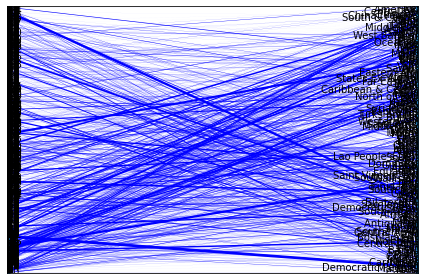

<Figure size 1e+10x1e+10 with 0 Axes>

In [9]:
drawGraph(dataForNetworkAnalysis2)

In [10]:

dataForNetworkAnalysis3 = macroSectorFilter([ 'Health'], ['USD_Commitment', 'USD_Commitment_Defl', 'DonorCode' ], ['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG'])

dataForNetworkAnalysis3

Index(['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG', 'DonorCode',
       'USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl',
       'USD_Disbursement_Defl'],
      dtype='object')


,Year,RecipientName,macro_sector,IsPPD,IsWBG,USD_Commitment,USD_Commitment_Defl,DonorCode
0,2002,Afghanistan,Health,0,0,135.619427,201.870661,3527
1,2002,Afghanistan,Health,1,0,15.078688,22.549224,5
2,2002,"Africa, regional",Health,0,0,277.291152,422.776292,3251
3,2002,"Africa, regional",Health,1,0,2.245461,2.719845,12
4,2002,Albania,Health,0,0,58.351210,87.293047,3357
...,...,...,...,...,...,...,...,...
5539,2020,Viet Nam,Health,0,0,7.733625,7.531997,928
5540,2020,West Bank and Gaza Strip,Health,0,0,189.482833,186.332914,1980
5541,2020,Yemen,Health,0,0,8.693928,8.545564,2120
5542,2020,Zambia,Health,0,0,3.564877,3.471956,1005


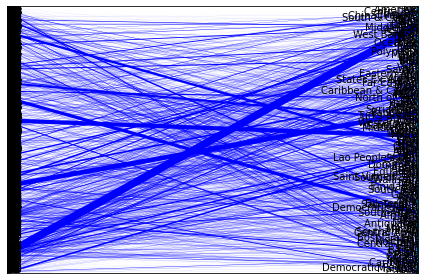

<Figure size 1e+10x1e+10 with 0 Axes>

{'Afghanistan': 0.08799194341337767,
 3527: 0.005085647502649759,
 5: 0.08685565227638742,
 'Africa, regional': 0.047247365460547336,
 3251: 0.002730743711755339,
 12: 0.10573946543512908,
 'Albania': 0.09800448831524444,
 3357: 0.010054955792630896,
 17: 0.13920701439290853,
 905: 0.31557135050747703,
 'Algeria': 0.04250074473280604,
 2986: 0.006327597567017987,
 'America, regional': 0.06180596238467278,
 4410: 0.0035721831574262956,
 'Angola': 0.07255989515161518,
 4981: 0.0041937254168458015,
 'Anguilla': 0.006111396424049518,
 'Antigua and Barbuda': 0.016523435787233233,
 'Argentina': 0.06525335658976521,
 4089: 0.0037714313050369575,
 901: 0.1178243893428665,
 'Armenia': 0.06697943586751624,
 'Asia, regional': 0.01192743865168117,
 4331: 0.0006893670742895349,
 'Azerbaijan': 0.0756511559978917,
 3975: 0.007095097033819405,
 'Bahrain': 3.297901380809025e-05,
 4: 0.000570603352929721,
 'Bangladesh': 0.05455751445239293,
 4307: 0.0031532464946490424,
 'Barbados': 0.017257901282681277

In [62]:

G = drawGraph(dataForNetworkAnalysis3)

def eigenvector_centrality_numpy(G, weight=None, max_iter=50, tol=0):
    r"""Compute the eigenvector centrality for the graph G.

    Eigenvector centrality computes the centrality for a node based on the
    centrality of its neighbors. The eigenvector centrality for node $i$ is

    .. math::

        Ax = \lambda x

    where $A$ is the adjacency matrix of the graph G with eigenvalue $\lambda$.
    By virtue of the Perron–Frobenius theorem, there is a unique and positive
    solution if $\lambda$ is the largest eigenvalue associated with the
    eigenvector of the adjacency matrix $A$ ([2]_).

    Parameters
    ----------
    G : graph
      A networkx graph

    weight : None or string, optional (default=None)
      The name of the edge attribute used as weight.
      If None, all edge weights are considered equal.
      In this measure the weight is interpreted as the connection strength.
    max_iter : integer, optional (default=100)
      Maximum number of iterations in power method.

    tol : float, optional (default=1.0e-6)
       Relative accuracy for eigenvalues (stopping criterion).
       The default value of 0 implies machine precision.

    Returns
    -------
    nodes : dictionary
       Dictionary of nodes with eigenvector centrality as the value.

    Examples
    --------
    >>> G = nx.path_graph(4)
    >>> centrality = nx.eigenvector_centrality_numpy(G)
    >>> print([f"{node} {centrality[node]:0.2f}" for node in centrality])
    ['0 0.37', '1 0.60', '2 0.60', '3 0.37']

    See Also
    --------
    eigenvector_centrality
    pagerank
    hits

    Notes
    -----
    The measure was introduced by [1]_.

    This algorithm uses the SciPy sparse eigenvalue solver (ARPACK) to
    find the largest eigenvalue/eigenvector pair.

    For directed graphs this is "left" eigenvector centrality which corresponds
    to the in-edges in the graph. For out-edges eigenvector centrality
    first reverse the graph with ``G.reverse()``.

    Raises
    ------
    NetworkXPointlessConcept
        If the graph ``G`` is the null graph.

    References
    ----------
    .. [1] Phillip Bonacich:
       Power and Centrality: A Family of Measures.
       American Journal of Sociology 92(5):1170–1182, 1986
       http://www.leonidzhukov.net/hse/2014/socialnetworks/papers/Bonacich-Centrality.pdf
    .. [2] Mark E. J. Newman:
       Networks: An Introduction.
       Oxford University Press, USA, 2010, pp. 169.
    """
    import numpy as np
    import scipy as sp
    import scipy.sparse.linalg  # call as sp.sparse.linalg

    if len(G) == 0:
        raise nx.NetworkXPointlessConcept(
            "cannot compute centrality for the null graph"
        )
    M = nx.to_scipy_sparse_matrix(G, nodelist=list(G), weight=weight, dtype=float)
    eigenvalue, eigenvector = sp.sparse.linalg.eigs(
        M.T, k=1, which="LR", maxiter=max_iter, tol=tol
    )
    largest = eigenvector.flatten().real
    norm = np.sign(largest.sum()) * sp.linalg.norm(largest)
    return dict(zip(G, largest / norm))


eigenvector_centrality_numpy(G, weight=None, max_iter=50, tol=0)



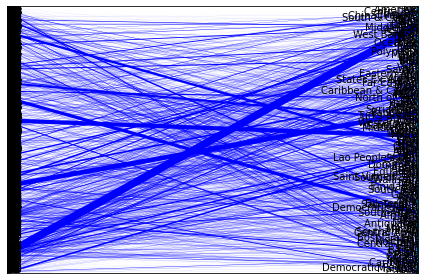

<Figure size 1e+10x1e+10 with 0 Axes>

{'Afghanistan': 0.011403073872087258,
 3527: 0.0004957858205255329,
 5: 0.012394645513138323,
 'Africa, regional': 0.010411502231036191,
 3251: 0.0004957858205255329,
 12: 0.01883986117997025,
 'Albania': 0.011898859692612791,
 3357: 0.0009915716410510659,
 17: 0.01883986117997025,
 905: 0.044124938026772434,
 'Algeria': 0.00842835894893406,
 2986: 0.0009915716410510659,
 'America, regional': 0.010411502231036191,
 4410: 0.0004957858205255329,
 'Angola': 0.009915716410510658,
 4981: 0.0004957858205255329,
 'Anguilla': 0.0004957858205255329,
 'Antigua and Barbuda': 0.0034705007436787306,
 'Argentina': 0.009419930589985125,
 4089: 0.0004957858205255329,
 901: 0.02181457610312345,
 'Armenia': 0.009915716410510658,
 'Asia, regional': 0.009915716410510658,
 4331: 0.0004957858205255329,
 'Azerbaijan': 0.010411502231036191,
 3975: 0.0009915716410510659,
 'Bahrain': 0.0004957858205255329,
 4: 0.0019831432821021317,
 'Bangladesh': 0.009915716410510658,
 4307: 0.0004957858205255329,
 'Barbados':

In [66]:

G = drawGraph(dataForNetworkAnalysis3)
from networkx.utils.decorators import not_implemented_for

__all__ = ["degree_centrality", "in_degree_centrality", "out_degree_centrality"]


def degree_centrality(G):
    """Compute the degree centrality for nodes.

    The degree centrality for a node v is the fraction of nodes it
    is connected to.

    Parameters
    ----------
    G : graph
      A networkx graph

    Returns
    -------
    nodes : dictionary
       Dictionary of nodes with degree centrality as the value.

    See Also
    --------
    betweenness_centrality, load_centrality, eigenvector_centrality

    Notes
    -----
    The degree centrality values are normalized by dividing by the maximum
    possible degree in a simple graph n-1 where n is the number of nodes in G.

    For multigraphs or graphs with self loops the maximum degree might
    be higher than n-1 and values of degree centrality greater than 1
    are possible.
    """
    if len(G) <= 1:
        return {n: 1 for n in G}

    s = 1.0 / (len(G) - 1.0)
    centrality = {n: d * s for n, d in G.degree()}
    return centrality


degree_centrality(G)

In [ ]:
from networkx.utils.decorators import not_implemented_for

__all__ = ["degree_centrality", "in_degree_centrality", "out_degree_centrality"]

@not_implemented_for("undirected")
def in_degree_centrality(G):
    """Compute the in-degree centrality for nodes.

    The in-degree centrality for a node v is the fraction of nodes its
    incoming edges are connected to.

    Parameters
    ----------
    G : graph
        A NetworkX graph

    Returns
    -------
    nodes : dictionary
        Dictionary of nodes with in-degree centrality as values.

    Raises
    ------
    NetworkXNotImplemented
        If G is undirected.

    See Also
    --------
    degree_centrality, out_degree_centrality

    Notes
    -----
    The degree centrality values are normalized by dividing by the maximum
    possible degree in a simple graph n-1 where n is the number of nodes in G.

    For multigraphs or graphs with self loops the maximum degree might
    be higher than n-1 and values of degree centrality greater than 1
    are possible.
    """
    if len(G) <= 1:
        return {n: 1 for n in G}

    s = 1.0 / (len(G) - 1.0)
    centrality = {n: d * s for n, d in G.in_degree()}
    return centrality
in_degree_centrality(G)

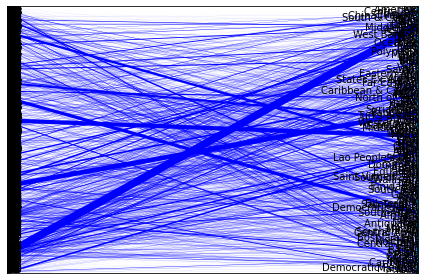

<Figure size 1e+10x1e+10 with 0 Axes>

In [11]:
    
drawGraph(dataForNetworkAnalysis3)